In [2]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.0 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!unzip -q /content/drive/MyDrive/cropped_images.zip

In [5]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [40]:
config = Cfg.load_config_from_name('vgg_transformer')

In [28]:
with open('/content/data/cropped_images_labels.txt', 'r') as f:
  lines = f.readlines()
  annotations = [f'cropped_images/{l}' for l in lines]

with open('/content/data/cropped_images_labels.txt', 'w') as f:
  f.writelines(annotations)

In [41]:
dataset_params = {
    'name':'hw',
    'data_root':'/content/data/',
    'train_annotation':'cropped_images_labels.txt',
    'valid_annotation':'cropped_images_labels.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [37]:
!rm -rf /content/train_hw
!rm -rf /content/valid_hw

In [42]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|███████████████████████████████████████| 6392/6392 [00:00<00:00, 11565.22it/s]

Created dataset with 6391 samples



Create valid_hw: 100%|███████████████████████████████████████| 6392/6392 [00:00<00:00, 10966.02it/s]

Created dataset with 6391 samples



valid_hw build cluster: 100%|███████████████████████████████| 6391/6391 [00:00<00:00, 157373.82it/s]


In [43]:
trainer.config.save('config.yml')

Seq2seq

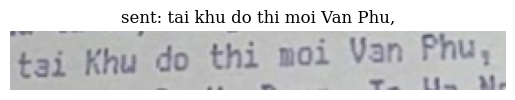

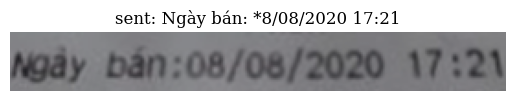

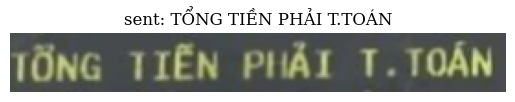

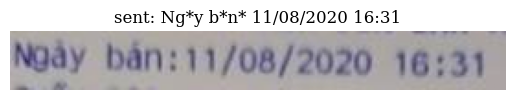

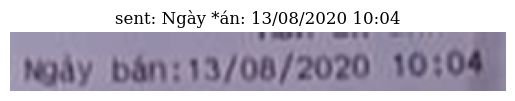

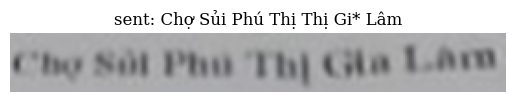

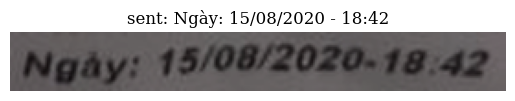

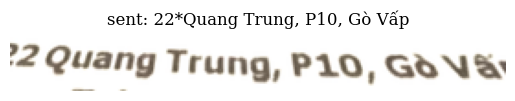

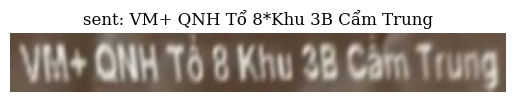

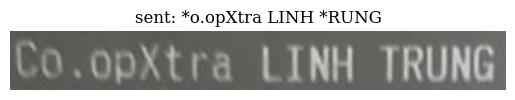

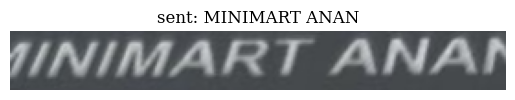

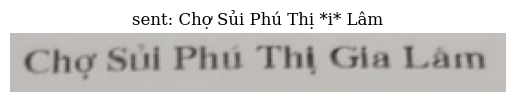

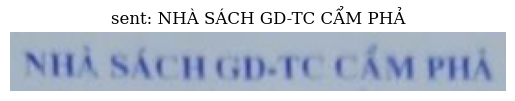

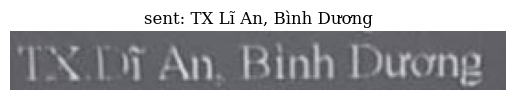

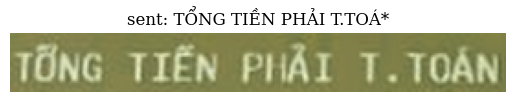

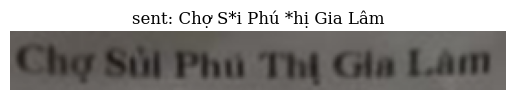

In [33]:
trainer.visualize_dataset()

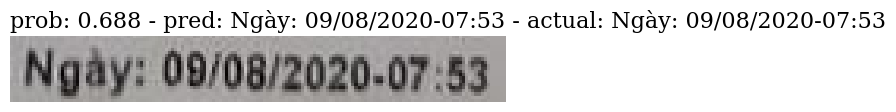

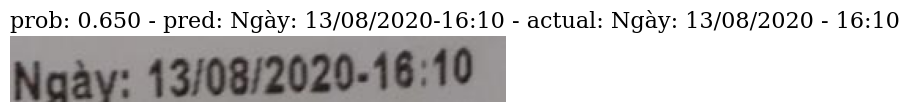

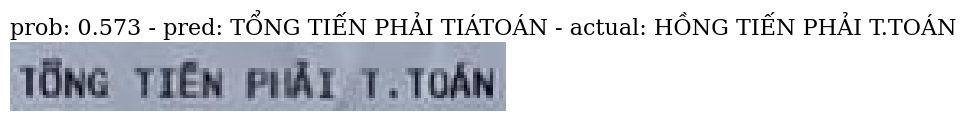

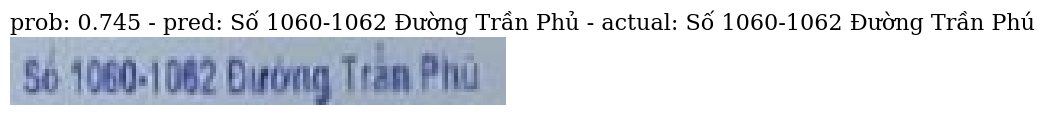

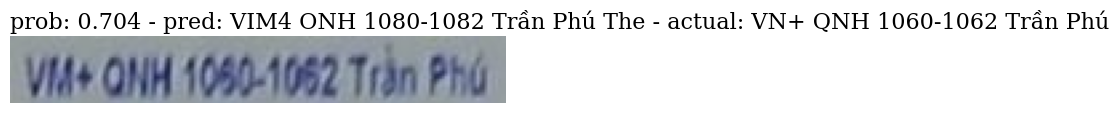

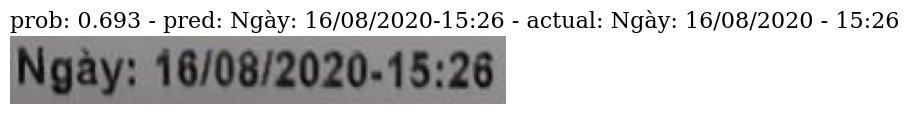

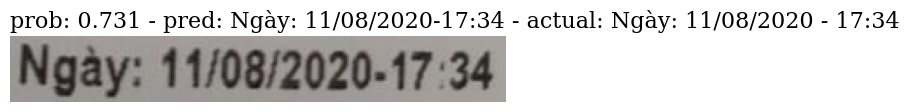

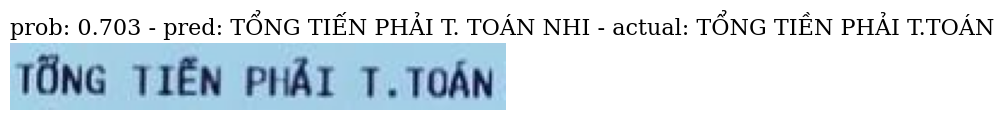

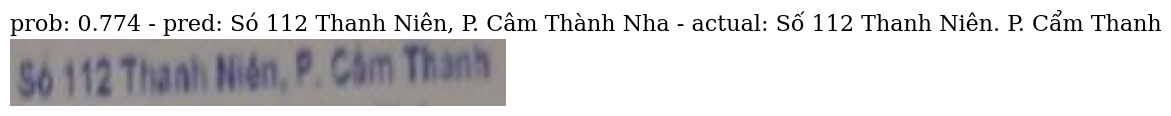

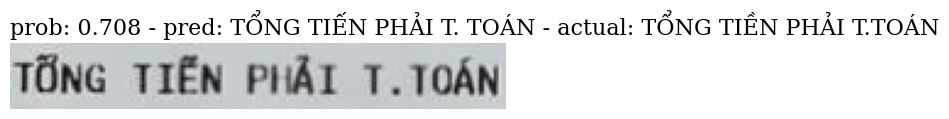

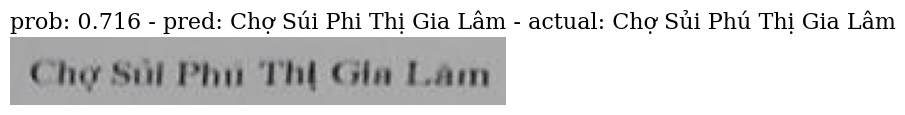

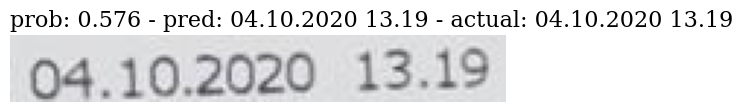

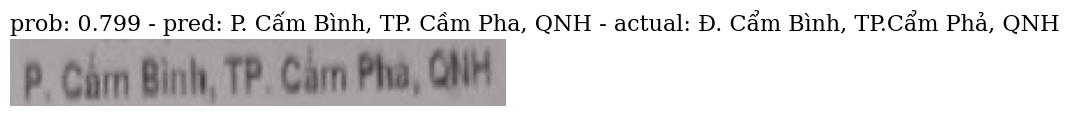

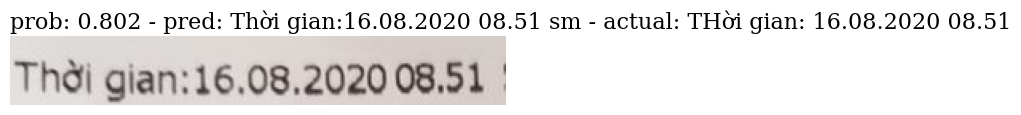

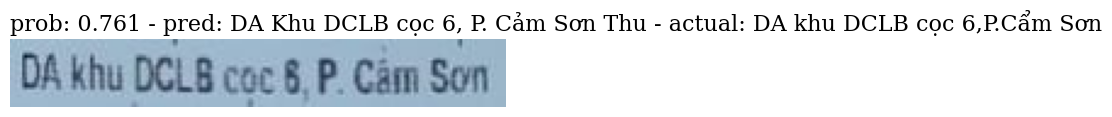

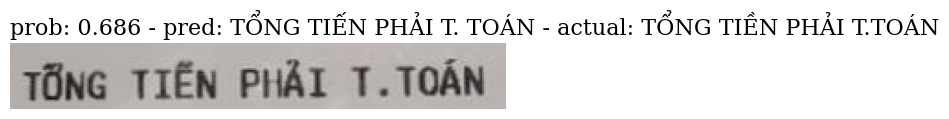

In [34]:
trainer.visualize_prediction()

In [36]:
trainer.precision()
# full, per char

(0.35404829545454547, 0.75574076)

TRANSFORMER

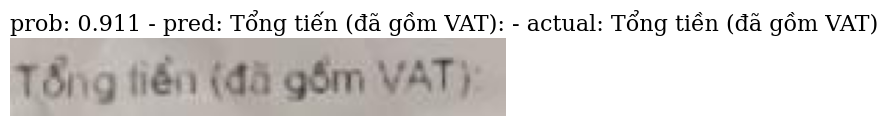

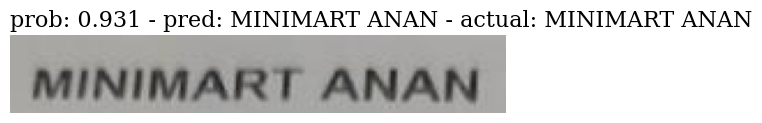

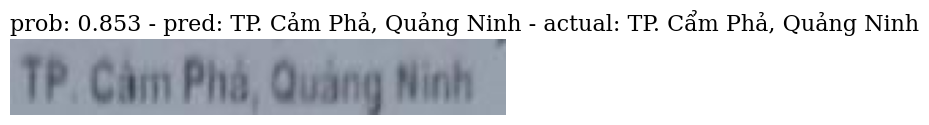

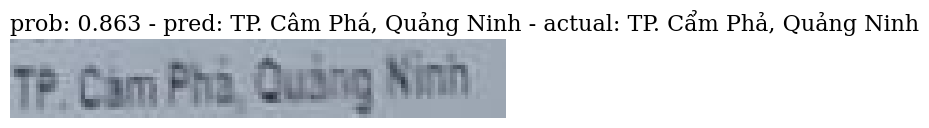

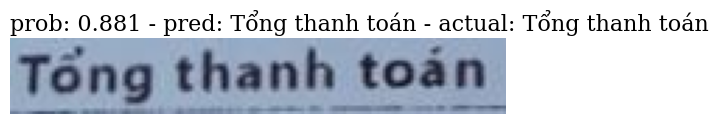

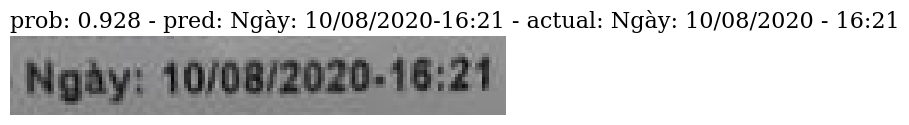

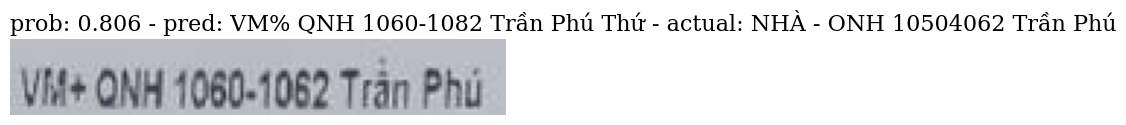

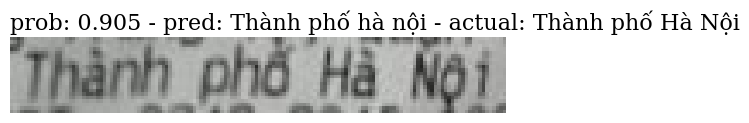

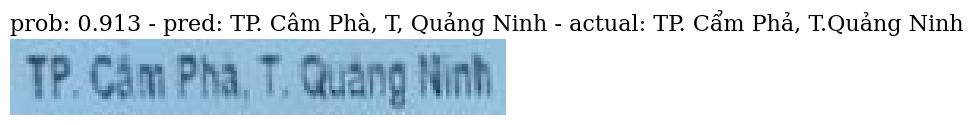

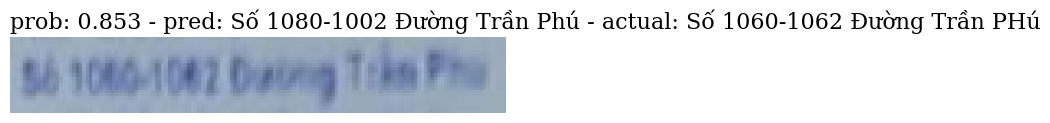

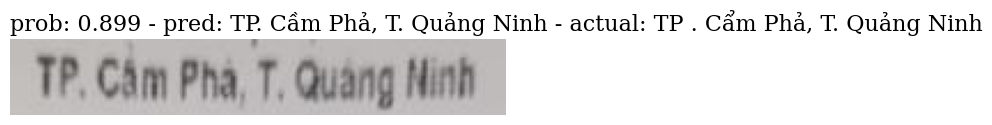

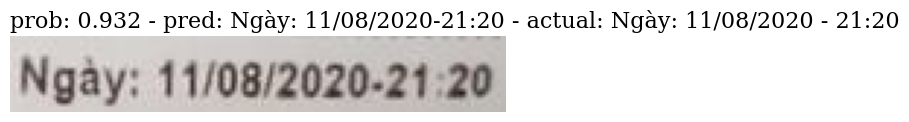

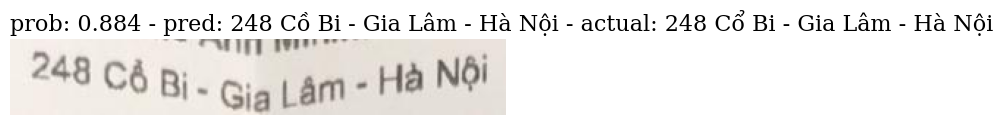

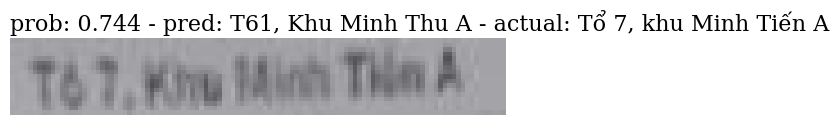

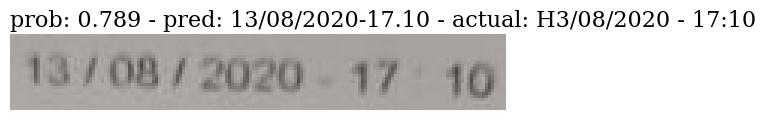

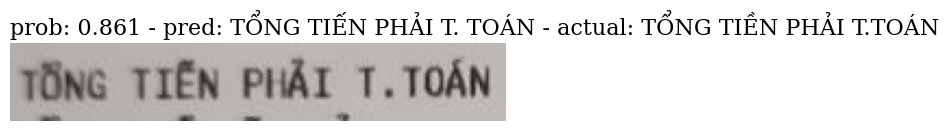

In [46]:
trainer.visualize_prediction()

In [47]:
trainer.precision()
# full, per char

(0.33451704545454547, 0.7662109)